# Predicting for Osteoporosis using Linear Algebra and Machine Learning Concepts
### By: Eric Chao, Camila Djurinsky Zapolski, Eric Powers

For our final project, we wanted to explore if it was possible to predict for osteoporosis using a variety of different Linear Algebra and Machine Learning Concepts we learned throughout the semester. The dataset we used was obtained from Kaggle. In this dataset, we have 13 columns of information regarding an individuals health status, which will be our predictor variables. Additionally, each individual within the dataset has provided information on whether they have osteoporosis or not, which is our response variable. Below is a step by step process of how we implemented the skills learned in class on an extensive dataset to predict for osteoporosis.

[Hyperlink to Osteoporosis Dataset](https://www.kaggle.com/datasets/amitvkulkarni/lifestyle-factors-influencing-osteoporosis/data)

# 1. Data Selection and Wrangling

## 1.1 Uploading the Data


In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
for filename in uploaded.keys():
    print('Uploaded file:', filename)

    # Read the CSV file
    df = pd.read_csv(filename)

## 1.2 Data Processing
In this step, we encode our categorical data into numerical values so that we can apply this dataset into the various models/algorithms we will be developing. <br> <br>For example, our gender column has reassigned 'Female' and 'Male' to 0 and 1 respectively. Refer to the output for encoded values. <br>
Note: NaN in our Output refers to None (Ex: Alcohol Consumption = None)

In [ ]:
# Cami
import warnings
warnings.filterwarnings("ignore")

#encoding the categorical data - cami
from sklearn.preprocessing import LabelEncoder

predVar = df[["Age", "Gender", "Family History", "Race/Ethnicity", "Body Weight", "Calcium Intake", "Vitamin D Intake",
                 "Physical Activity", "Smoking", "Alcohol Consumption", "Medical Conditions", "Medications", "Prior Fractures"]]
colNames = ["Age", "Gender", "FamHist", "R/E", "Weight", "Calcium", "VitD", "Activity", "Smoking", "AlcCons", "MedCond", "Meds", "PriorFract"]
predVar.columns = colNames

# Initialize label encoder
label_encoder = LabelEncoder()

# Dictionary to store encoding keys for each column
encoding_keys = {}

# Apply label encoding to all categorical columns
for col in predVar.columns:
    if predVar[col].dtype == 'object':  # Check if column is categorical
        predVar[col] = label_encoder.fit_transform(predVar[col])
        encoding_keys[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

#encoding keys
for col, key in encoding_keys.items():
    print(col + ':', key)

Gender: {'Female': 0, 'Male': 1}
FamHist: {'No': 0, 'Yes': 1}
R/E: {'African American': 0, 'Asian': 1, 'Caucasian': 2}
Weight: {'Normal': 0, 'Underweight': 1}
Calcium: {'Adequate': 0, 'Low': 1}
VitD: {'Insufficient': 0, 'Sufficient': 1}
Activity: {'Active': 0, 'Sedentary': 1}
Smoking: {'No': 0, 'Yes': 1}
AlcCons: {'Moderate': 0, nan: 1}
MedCond: {'Hyperthyroidism': 0, 'Rheumatoid Arthritis': 1, nan: 2}
Meds: {'Corticosteroids': 0, nan: 1}
PriorFract: {'No': 0, 'Yes': 1}


# 2. Exploratory Data Analysis

## 2.1 Nulls and Outliers

In any Data Science project, null values and outliers generally must be dealt with in order to complete an analysis. However, the dataset we have selected fortunately did not have any null values or outliers. Regarding the outliers, since each column is a categorical variable, there is no need to deal with outliers since a specific trait is categorized (unlike a continuous variable which can have a large range of values).

## 2.2 Age Distrbution

Before creating any models, it is important to do some general exploratory data analysis to better understand the dataset. Given that there is only one continuous predictor variable, age, it simplifies our responsibilities of needing to normalize the dataset. Below is a simple distribution of the age to provide us with a general idea of who the dataset sampled from. Looking at the histogram below, we can see that the dataset primarily samples from individuals between the ages of 18 and 40, but there are also quite a few between the ages of 40 and 90. This may imply later on that models developed are more accurate and cater towards a younger demographic.

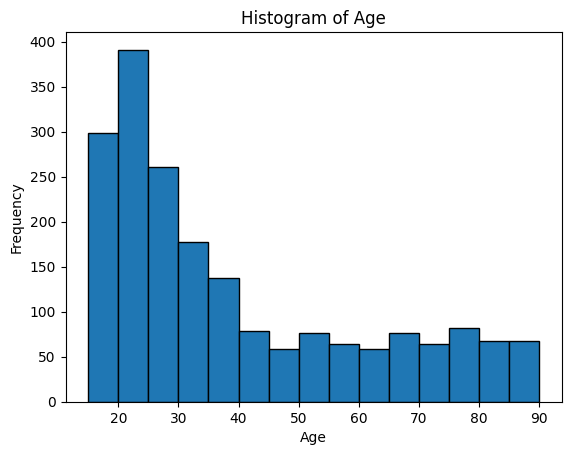

In [ ]:
#Creating a Histogram for Age Distribution
import matplotlib.pyplot as plt

plt.hist(predVar['Age'], bins=[15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90], edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

## 2.3 Distribution of Categorical Variables

Next, we wanted to see the distribution of what categories individuals fell under for each variable/column. Generally, we can see that for each column, there is an even distribution of individuals who fall under each category. This provides us with confidence that no predictor variable may be the cause of a biased outcome for having osteoporosis or not and impacting any models that are developed later on.

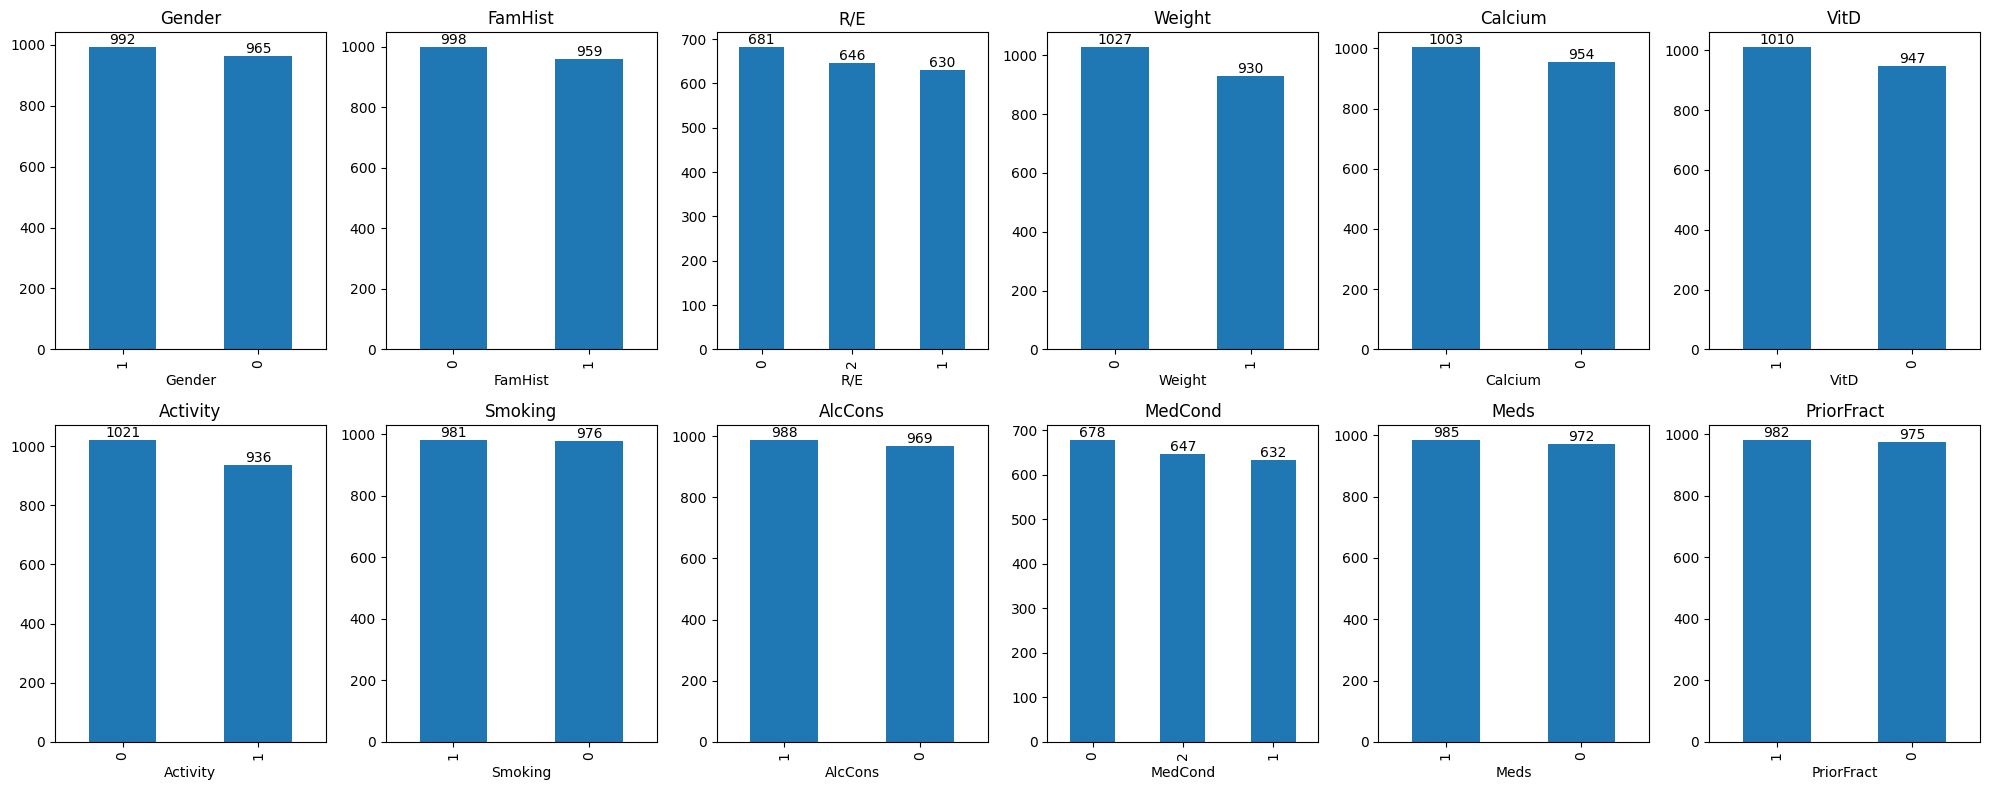

In [ ]:
# Creating a "Histogram" to Show the Distribution of Categories in Each Categorical Column
predVarNoAge = predVar[1:]
fig, axes = plt.subplots(nrows = 2, ncols = 6, figsize = (20, 8))
axes = axes.flatten()

for i, col in enumerate(predVarNoAge.columns[1:]):
  ax = axes[i]
  counts = predVarNoAge[col].value_counts()
  counts.plot(kind = 'bar', ax = ax)
  ax.set_title(col)

  for j, count in enumerate(counts):
        ax.text(j, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# 3. Model Development

In this section, we will fit the data to a variety of different regression models in order to identify which model best predicts for osteoporosis.

## 3.1 Random Forest Classifier

In [ ]:
#Random Forest - Cami
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#Training and Testing Datasets
X_train, X_test, y_train, y_test = train_test_split(predVar, df["Osteoporosis"], test_size=0.2, random_state=55)

#Initialize, Train and Predict with Random Forest Classifier
RFClassifier = RandomForestClassifier(n_estimators=100)
RFClassifier.fit(X_train, y_train)
RFPred = RFClassifier.predict(X_test)

#Calculate Accuracy
RFMAccuracy = accuracy_score(y_test, RFPred)
print("Random Forest Classifier Osteoporosis Accuracy:", RFMAccuracy)
print(classification_report(y_test,RFPred))

Random Forest Classifier Osteoporosis Accuracy: 0.8341836734693877
              precision    recall  f1-score   support

           0       0.79      0.93      0.85       201
           1       0.90      0.74      0.81       191

    accuracy                           0.83       392
   macro avg       0.85      0.83      0.83       392
weighted avg       0.84      0.83      0.83       392



## 3.2 Gradient Boosting Classifier

In [ ]:
#Gradiant Boosting - Cami
from sklearn.ensemble import GradientBoostingClassifier

#Training and Testing Datasets
X_train, X_test, y_train, y_test = train_test_split(predVar, df["Osteoporosis"], test_size=0.2, random_state=55)

#Initialize, Train and Predict with Random Forest Classifier
GBClassifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
GBClassifier.fit(X_train, y_train)
GBPred = GBClassifier.predict(X_test)

#Calculate Accuracy
GBMAccuracy = accuracy_score(y_test, GBPred)
print("Gradient Boosting Classifier Osteoporosis Accuracy:", GBMAccuracy)
print(classification_report(y_test,GBPred))

Gradient Boosting Classifier Osteoporosis Accuracy: 0.9158163265306123
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       201
           1       1.00      0.83      0.91       191

    accuracy                           0.92       392
   macro avg       0.93      0.91      0.91       392
weighted avg       0.93      0.92      0.92       392



## 3.3 Decision Tree Classifier

In [ ]:
#Decision Tree - Eric P.
from sklearn.tree import DecisionTreeClassifier

#Training and Testing Datasets
X_train, X_test, y_train, y_test = train_test_split(predVar, df["Osteoporosis"], test_size=0.2, random_state=55)

#Initialize, Train and Predict with Decision Tree Classifier
DTClassifier = DecisionTreeClassifier()
DTClassifier.fit(X_train, y_train)
DTPred = DTClassifier.predict(X_test)

# Calculate Accuracy
DTAccuracy = accuracy_score(y_test, DTPred)
print("Decision Tree Classifier Osteoporosis Accuracy:", DTAccuracy)
print(classification_report(y_test,DTPred))

Decision Tree Classifier Osteoporosis Accuracy: 0.8137755102040817
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       201
           1       0.79      0.85      0.82       191

    accuracy                           0.81       392
   macro avg       0.82      0.81      0.81       392
weighted avg       0.82      0.81      0.81       392



## 3.4 Logistic Regression

In [ ]:
#Logistic Regression - Cami
from sklearn.linear_model import LogisticRegression

#Training and Testing Datasets
X_train, X_test, y_train, y_test = train_test_split(predVar, df["Osteoporosis"], test_size = 0.2, random_state = 55)

#Initialize, Train and Predict with Logistic Regression
LogisticReg = LogisticRegression()
LogisticReg.fit(X_train, y_train)
LogisticPred = LogisticReg.predict(X_test)

#Calculate Accuracy
LogisticAccuracy = accuracy_score(y_test, LogisticPred)
print("Logistic Regression Osteoporosis Accuracy:", LogisticAccuracy)
print(classification_report(y_test,LogisticPred))

Logistic Regression Osteoporosis Accuracy: 0.8061224489795918
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       201
           1       0.82      0.77      0.80       191

    accuracy                           0.81       392
   macro avg       0.81      0.81      0.81       392
weighted avg       0.81      0.81      0.81       392



## 3.5 Support Vector Classification

In [ ]:
# SVC - Eric P.
from sklearn.svm import SVC

#Training and Testing Datasets
X_train, X_test, y_train, y_test = train_test_split(predVar, df["Osteoporosis"], test_size = 0.2, random_state = 55)

#Initialize, Train and Predict with Decision Tree Classifier
SVCModel = SVC(kernel = 'linear')
SVCModel.fit(X_train, y_train)
SVCPred = SVCModel.predict(X_test)

#Calculate the Accuracy
SVCAccuracy = accuracy_score(y_test, SVCPred)
print("Support Vector Regression Osteoporosis Accuracy:", SVCAccuracy)
print(classification_report(y_test, SVCPred))

Support Vector Regression Osteoporosis Accuracy: 0.8137755102040817
              precision    recall  f1-score   support

           0       0.80      0.86      0.82       201
           1       0.84      0.77      0.80       191

    accuracy                           0.81       392
   macro avg       0.82      0.81      0.81       392
weighted avg       0.82      0.81      0.81       392



## 3.6 K-Nearest Neighbors

In [ ]:
#KNN - Cami
from sklearn.neighbors import KNeighborsClassifier

#Training and Testing Datasets
X_train, X_test, y_train, y_test = train_test_split(predVar, df["Osteoporosis"], test_size=0.2, random_state=55)

#Initialize, Train and Predict with KNN Classifier
KNNClassifier = KNeighborsClassifier(n_neighbors=10)  # You can adjust the number of neighbors (k) here
KNNClassifier.fit(X_train, y_train)
KNNPred = KNNClassifier.predict(X_test)

# Calculate Accuracy
KNNAccuracy = accuracy_score(y_test, KNNPred)
print("KNN Classifier Osteoporosis Accuracy:", KNNAccuracy)
print(classification_report(y_test, KNNPred))

KNN Classifier Osteoporosis Accuracy: 0.8647959183673469
              precision    recall  f1-score   support

           0       0.80      0.98      0.88       201
           1       0.97      0.75      0.84       191

    accuracy                           0.86       392
   macro avg       0.88      0.86      0.86       392
weighted avg       0.88      0.86      0.86       392



## 3.7 K Means Clustering Observations

Given that we are classifying for two categories (having osteoporosis or not), we wanted to test if a clustering algorithm could accurately seperate the two groups. Unsurprisingly, our labeled dataset performs better on supervised learning algorithms such as classification models as opposed to unsupervised learning algorithms such as clustering.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

kmeans = KMeans(n_clusters = 2)
clustersOne = kmeans.fit_predict(predVar)
clustersTwo = kmeans.labels_

accuracy_score(df["Osteoporosis"], clustersOne)

0.20633299284984677

## 3.8 Model Evaluation


                 Model  Accuracy
1    Gradient Boosting  0.915816
5                  KNN  0.864796
0       Random Forrest  0.834184
2        Decision Tree  0.813776
4                  SVC  0.813776
3  Logistic Regression  0.806122


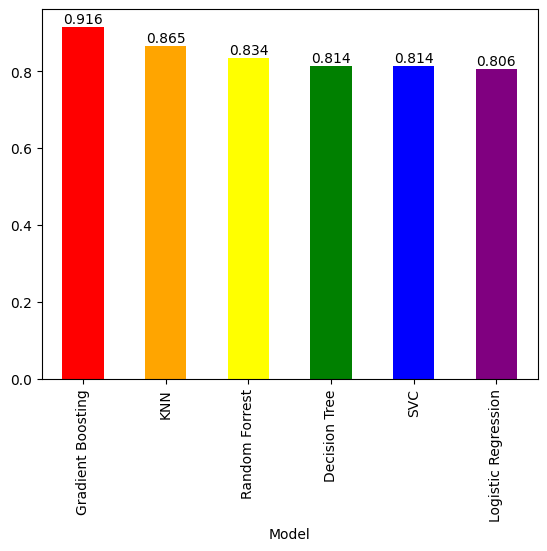

In [ ]:
## 2.8 Model Evaluation

#Create Data Frame of Model Type and Accuracy
modelAccuracy = {
  'Model': ["Random Forrest", "Gradient Boosting", "Decision Tree", "Logistic Regression", "SVC", "KNN"],
  'Accuracy': [RFMAccuracy, GBMAccuracy, DTAccuracy, LogisticAccuracy, SVCAccuracy, KNNAccuracy]
}

modelComp = pd.DataFrame(modelAccuracy)
modelComp = modelComp.sort_values("Accuracy", ascending = False)

#Create List and Bar Graph of Sorted Accuracy Values
print(modelComp)

model = modelComp.plot(kind = 'bar', x = 'Model', y = 'Accuracy', legend = False, color = ['red', 'orange', 'yellow', 'green', 'blue', 'purple'])
for index, value in enumerate(modelComp['Accuracy']):
    model.text(index, value + 0.01, str(round(value, 3)), ha='center')

When comparing the classification models that we tested, it is evident that our **gradient boosting model** does the best at accurately predicting for osteoporosis. What stood out from our gradient boosting model was that it had roughly 100% precision in classifiying those who had osteoporosis. With this conclusion, we will now explore whether it is possible to simplify our model in order to maintain or improve the accuracy of our predictive model.

# 4. Dimensionality Reduction

Now that we have identified our best model, we want to identify ways that we can simplify our model.

## 4.1 Correlation Matrix

Our first steps in dimensionality reduction is to identify if there are any highly correlated predictor variables. An output below is produced to highlight that there are no correlations between the variables. However, the reasoning behind this is due to the fact that we are working with categorical variables and thus no correlation can be identified. Another method must be used to elimnate unneccesary variables.

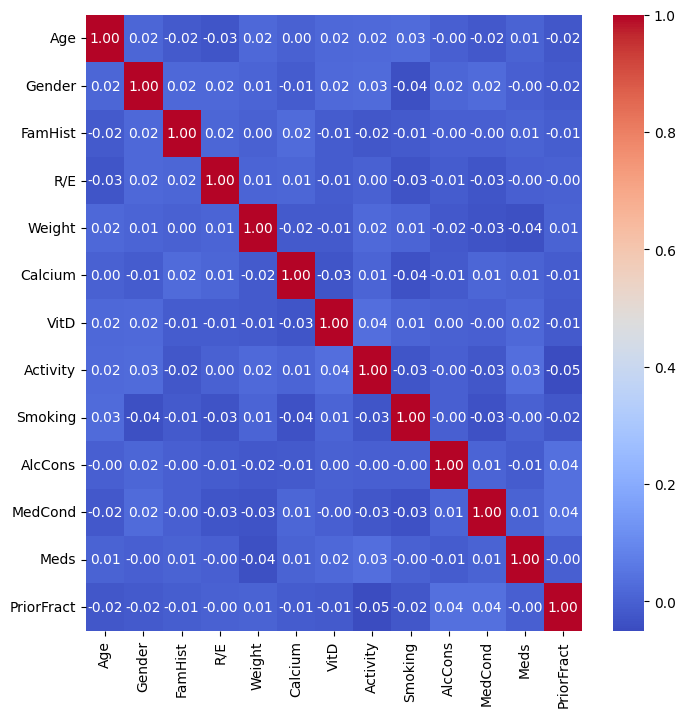

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlationMatrix = predVar.corr()

plt.figure(figsize=(8, 8))
sns.heatmap(correlationMatrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

## 4.2 Feature Importance (via Random Forrest)

In the Random Forrest Model, there is a function/command that allows users to identify which variables were considered "important" in predicting for osteoporosis. Below we can see that age has the greatest importance. The other variables do not seem to have extreme significance. To improve our model, we opted to remove five variables to see if it would impact our accuracy. After removing those five variables, it appeared that our accuracy was not impacted. This implied a simplified model can be used.

In [ ]:
importantVar = RFClassifier.feature_importances_

# Create a DataFrame and Sort Important Features
feature_importances = pd.DataFrame({'Variable': predVar.columns, 'Importance': importantVar})
feature_importances = feature_importances.sort_values('Importance', ascending=False)

print(feature_importances)

# Identify 5 Least Important Variables
notImpVar = feature_importances.tail(5)[['Variable']] # Change Variable Depending on How Many Variables You Want to Remove
removedVariables = []

for index, row in notImpVar.iterrows():
    variable = row['Variable']
    removedVariables.append(variable)

      Variable  Importance
0          Age    0.648619
10     MedCond    0.046761
3          R/E    0.044093
2      FamHist    0.027880
5      Calcium    0.027028
9      AlcCons    0.026924
8      Smoking    0.026796
6         VitD    0.026658
1       Gender    0.025575
4       Weight    0.025568
12  PriorFract    0.024889
11        Meds    0.024619
7     Activity    0.024590


In [ ]:
#Training and Testing Datasets
X_train2, X_test2, y_train2, y_test2 = train_test_split(predVar.drop(columns=removedVariables), df["Osteoporosis"], test_size=0.2, random_state=55)

#Initialize, Train and Predict with Random Forest Classifier
GBClassifier2 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
GBClassifier2.fit(X_train2, y_train2)
GBPred2 = GBClassifier2.predict(X_test2)

#Calculate Accuracy
GBMAccuracy2 = accuracy_score(y_test2, GBPred2)
print("Gradient Boosting Classifier Osteoporosis Accuracy:", GBMAccuracy2)
print(classification_report(y_test2,GBPred2))

Gradient Boosting Classifier Osteoporosis Accuracy: 0.9158163265306123
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       201
           1       1.00      0.83      0.91       191

    accuracy                           0.92       392
   macro avg       0.93      0.91      0.91       392
weighted avg       0.93      0.92      0.92       392



## 4.3 Principle Component Analysis Observations

In our implementation of PCA, it was striking to see that by having only one principal component, greater than 99% of the variance is captured. This observation immediately signaled to us that something was most likely wrong. It was concluded that Principle Component Analysis works with continuous variables, not categorical variables. This made it not feasible to create a gradient boosting model using principal components derived from categroical variables. However, the insights we can gather from our output are which columns have the greatest contributions towards the principal components. Similar to the feature importance, it appears age is the most important predictor as well as Race and Ethnicity (R/E).



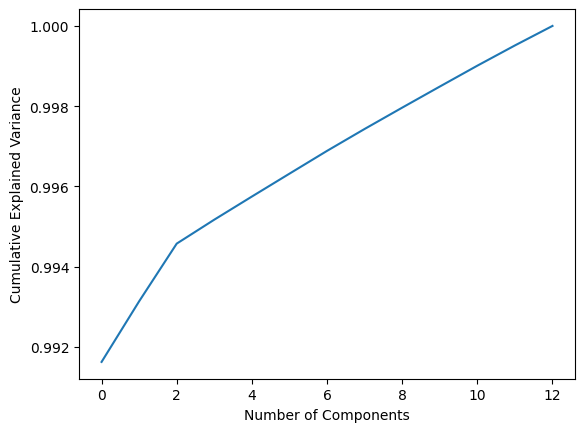

Loadings (Column Contribution to Principal Components):
                 PC1       PC2       PC3       PC4       PC5       PC6  \
Age         0.999998  0.000202  0.001422  0.000720 -0.000658  0.000009   
Gender      0.000354 -0.005190  0.029334 -0.355657 -0.158214  0.519853   
FamHist    -0.000395  0.010237  0.010608 -0.009681 -0.451739 -0.044315   
R/E        -0.001135  0.701845  0.710837  0.012806  0.038647 -0.008765   
Weight      0.000399  0.026503 -0.015736  0.057882  0.023363  0.289555   
Calcium     0.000050  0.000325  0.018529 -0.132950 -0.566016 -0.326037   
VitD        0.000449 -0.006135 -0.010366 -0.353339  0.387508  0.169195   
Activity    0.000484  0.017699 -0.015996 -0.600531  0.092867  0.092325   
Smoking     0.000647  0.001440 -0.047641  0.235240  0.522014 -0.282919   
AlcCons    -0.000106 -0.014668 -0.002564  0.147661 -0.001458  0.465979   
MedCond    -0.000800 -0.710865  0.699905 -0.009777  0.036793 -0.019423   
Meds        0.000161 -0.006622  0.002969 -0.316983  0.06

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA()
PCAFit = pca.fit_transform(predVar)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

loadings = pca.components_

column_names = [f'PC{i+1}' for i in range(loadings.shape[0])]
loadings_df = pd.DataFrame(loadings.T, columns=column_names, index = predVar.columns)

# Display the loadings DataFrame
print("Loadings (Column Contribution to Principal Components):")
print(loadings_df)

# 5. Insights and Model Deployment

After completing our analysis and model creation on our osteoporosis dataset, it was determined that the **gradient boosting classifier** performs the best. Feature engineering can be done to remove variables considered the "least important" from our feature importance function in our random forest model. Below is the best model implementation we have created. Regarding the data, there was a lot of categorical vairbles and thus there could be more continuous variables to strengthen our prediction. However, next steps with this model could include creating a website or application where patients can imput their health conditions used as our predictor variables to predict for osteoporosis. This can potentially change lives by warning people of the likelihood of having osteoporosis.

**Please refer to our write up for more in-depth analysis**

In [ ]:
#Training and Testing Datasets
X_train2, X_test2, y_train2, y_test2 = train_test_split(predVar.drop(columns=removedVariables), df["Osteoporosis"], test_size=0.2, random_state=55)

#Initialize, Train and Predict with Random Forest Classifier
GBClassifier2 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
GBClassifier2.fit(X_train2, y_train2)
GBPred2 = GBClassifier2.predict(X_test2)

#Calculate Accuracy
GBMAccuracy2 = accuracy_score(y_test2, GBPred2)
print("Gradient Boosting Classifier Osteoporosis Accuracy:", GBMAccuracy2)
print(classification_report(y_test2,GBPred2))